In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from flask import Flask, Response, render_template
import threading
import time

from PIL import Image
import requests  

# 🚗  Car detection from Image

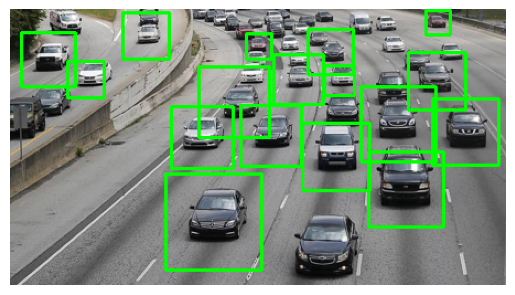

In [40]:
# Read image from URL
image = Image.open(requests.get(
    'https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg',
    stream=True).raw)

image = image.resize((450, 250))

# Convert PIL → NumPy array → BGR (for OpenCV)
img = np.array(image)                    # RGB
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # convert RGB → BGR

# Load cascade
car_cascade = cv2.CascadeClassifier("haarcascade_car.xml")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect cars
cars = car_cascade.detectMultiScale(gray, 1.1, 3)

# Draw boxes
for (x, y, w, h) in cars:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Show result (BGR → RGB)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# 🚗  Live Car detection 

In [44]:
# Load the car cascade classifier (use your downloaded file)
car_classifier = cv2.CascadeClassifier(r"C:\Users\hp\Documents\new DS\AI\Deep_Learning\venv\Open CV\haarcascade_car.xml")

# Check if loaded correctly
if car_classifier.empty():
    print("Error: Could not load haarcascade_car.xml")
    exit()

# Video path
video_path = r'C:\Users\hp\Documents\new DS\AI\Deep_Learning\venv\Open CV\cars_video.mp4'

# Load the video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open the video.")
    exit()

print("Video opened successfully. Starting car detection...")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video ended.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cars = car_classifier.detectMultiScale(gray, 1.1, 3)

    for (x, y, w, h) in cars:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow('Cars Detection', frame)

    # Exit when Enter key is pressed
    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()

Video opened successfully. Starting car detection...


KeyboardInterrupt: 